In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import csv

In [2]:
fixtures_file_path = os.getcwd()[:-4] + '\\csvData\\fixtures\\fixtures.csv'
fixtures_data = pd.read_csv(fixtures_file_path)

# fixtures_data['home_form'].value_counts().sum()
# fixtures_data['away_form'].value_counts().sum()
# fixtures_data['ht_score'].value_counts().sum()

In [3]:
df = fixtures_data[["league", "match_id", 'home_tean_id', 'away_tean_id', 'home_form', 'away_form', 'ht_score', 'home_score', 'away_score']]
df = df.dropna()
df[['hht_score','aht_score']] = df.ht_score.str.split("-",expand=True)
df = df.drop(columns=['ht_score'])
df = df.rename(columns={'home_score': 'hft_score','away_score': 'aft_score'} )
# df = df.iloc['home_score'].apply(int)
df.dtypes

league           object
match_id          int64
home_tean_id      int64
away_tean_id      int64
home_form        object
away_form        object
hft_score       float64
aft_score       float64
hht_score        object
aht_score        object
dtype: object

In [4]:
df['hft_score'] = df['hft_score'].astype(np.int64)
df['aft_score'] = df['aft_score'].astype(np.int64)
df['hht_score'] = df['hht_score'].astype(np.int64)
df['aht_score'] = df['aht_score'].astype(np.int64)
df

,league,match_id,home_tean_id,away_tean_id,home_form,away_form,hft_score,aft_score,hht_score,aht_score
2592,K1,8652699,3690,3695,4-3-3,3-4-3,1,0,0,0
2594,K1,8653704,3694,3698,4-5-1,4-3-3,4,0,2,0
2600,K1,8653710,3696,3691,3-4-3,3-4-3,0,0,0,0
2601,K1,8653711,4227,3693,4-4-2,4-4-2,0,2,0,2
2603,K1,8654660,3701,3704,4-2-3-1,4-3-3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
21632,BZ,31236754,2224,864,4-4-2,4-2-3-1,1,5,0,1
21633,BZ,31236755,2217,870,4-1-3-2,4-3-1-2,2,0,2,0
21636,BZ,31236747,869,2228,4-3-3,4-3-3,0,0,0,0
21637,BZ,31236749,2223,2214,4-2-3-1,4-1-4-1,3,1,0,1


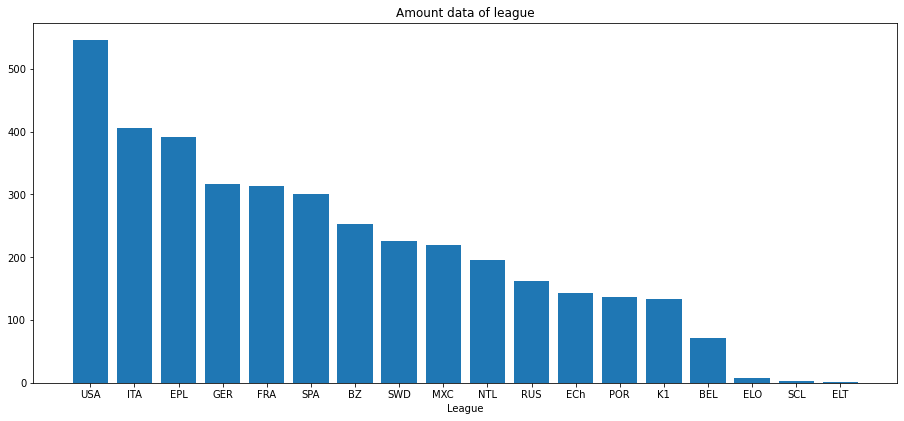

In [5]:
data_amount = df['league'].value_counts().reset_index(name='counts')

labels = data_amount['index']
sizes = data_amount['counts']

fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(data_amount['index'], data_amount['counts'])
plt.title("Amount data of league") 
plt.xlabel("League")

plt.show()


# plt.ylabel("height")

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, shadow=True, startangle=90)
# ax1.axis('equal')
# plt.show()

In [6]:
leg_fomation_frequency = df.groupby(["league", "home_form", 'away_form']).size().reset_index(name="Time")
# leg_fomation_frequency['Time'].argmax()
leg_fomation_frequency.iloc[leg_fomation_frequency['Time'].argmax()]

league           USA
home_form    4-2-3-1
away_form    4-2-3-1
Time             109
Name: 860, dtype: object

In [7]:
# leg_fomation_frequency = df.groupby(["league", "home_form"]).size().reset_index(name="Time")
# leg_fomation_frequency



# home_form = df['home_form'].value_counts().reset_index(name='counts')
# away_form = df['away_form'].value_counts().reset_index(name='counts')

# form = pd.concat([home_form, away_form], axis=0)
# form = form.groupby('index').sum()
# form

In [8]:
# fig = plt.figure(figsize=(12, 5))
# ax = fig.add_axes([0,0,1,1])
# ax.bar(form.index,form.counts)
# plt.show()

# fomation_frequency = df.groupby(["home_form", "away_form"]).size().reset_index(name="Time")
# fomation_frequency.max()

# fig = plt.figure(figsize = (10, 5)) 
# plt.bar(courses, values, color ='maroon', width = 0.4) 

# group_df = df.groupby(["home_form", "away_form"]).sum()
# group_df = group_df.drop(columns=['match_id', 'home_tean_id', 'away_tean_id'])
# group_df

# group_df.iloc[group_df['hft_score'].argmax()]
# group_df.iloc[group_df['hft_score'].argmin()]
# group_df.iloc[group_df['hht_score'].argmax()]
# group_df.iloc[group_df['aht_score'].argmax()]